In [ ]:
!pip install bertopic datasets datamapplot

  Using cached bertopic-0.17.3-py3-none-any.whl.metadata (24 kB)
  Using cached datamapplot-0.6.3-py3-none-any.whl.metadata (7.8 kB)
  Using cached colorspacious-1.1.2-py2.py3-none-any.whl.metadata (3.6 kB)
  Using cached dask-2024.12.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached datashader-0.18.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached pylabeladjust-0.1.13-py3-none-any.whl.metadata (8.2 kB)
  Using cached lz4-4.4.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)

In [ ]:
from datasets import load_dataset

dataset = load_dataset("bunkalab/arxiv_topic_modeling")["train"]

print(dataset.column_names)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/504 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1440 [00:00<?, ? examples/s]

['Title', 'Authors', 'Abstract', 'entry_id', 'Date', 'Categories', 'year']


In [ ]:
# Extract abstracts to train on and corresponding titles
abstracts = dataset["Abstract"]
titles = dataset["Title"]

# Convert to plain list of strings, in case it's a numpy array or Arrow array
abstracts = list(abstracts)
titles = list(titles)

print(len(abstracts))
print(len(titles))


1440
1440


In [ ]:
# The abstract of "Attention Is All You Need"
print(abstracts[150])

The age of social media has opened new opportunities for businesses. This flourishing wealth of information is outside traditional channels and frameworks of classical marketing research, including that of Marketing Mix Modeling (MMM). Textual data, in particular, poses many challenges that data analysis practitioners must tackle. Social media constitute massive, heterogeneous, and noisy document sources. Industrial data acquisition processes include some amount of ETL. However, the variability of noise in the data and the heterogeneity induced by different sources create the need for ad-hoc tools. Put otherwise, customer insight extraction in fully unsupervised, noisy contexts is an arduous task. This research addresses the challenge of fully unsupervised topic extraction in noisy, Big Data contexts. We present three approaches we built on the Variational Autoencoder framework: the Embedded Dirichlet Process, the Embedded Hierarchical Dirichlet Process, and the time-aware Dynamic Embe

# **Pipeline for Text Clustering**

## **1. Embedding Documents**

In [ ]:
from sentence_transformers import SentenceTransformer

# Create an embedding for each abstract
embedding_model = SentenceTransformer('thenlper/gte-small')
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

Batches:   0%|          | 0/45 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [ ]:
# Check the dimensions of the resulting embeddings
embeddings.shape

(1440, 384)

## **2. Reducing the Dimensionality of Embeddings**


In [ ]:
from umap import UMAP

# We reduce the input embeddings from 384 dimenions to 5 dimenions
umap_model = UMAP(
    n_components=5, min_dist=0.0, metric='cosine', random_state=42
)
reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## **3. Cluster the Reduced Embeddings**

In [ ]:
from hdbscan import HDBSCAN

# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size=50, metric='euclidean', cluster_selection_method='eom'
).fit(reduced_embeddings)
clusters = hdbscan_model.labels_

# How many clusters did we generate?
len(set(clusters))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


4

In [ ]:
import numpy as np

# Print first three documents in cluster 0
cluster = 0
for index in np.where(clusters==cluster)[0][:10]:
    print(abstracts[index][:300] + "... \n")

The increasing sophistication of cyber threats necessitates proactive measures to identify vulnerabilities and potential exploits. Underground hacking forums serve as breeding grounds for the exchange of hacking techniques and discussions related to exploitation. In this research, we propose an inno... 

This paper presents the second part of the two-part survey series on decomposition-based evolutionary multi-objective optimization where we mainly focus on discussing the literature related to multi-objective evolutionary algorithms based on decomposition (MOEA/D). Complementary to the first part, h... 

As ChatGPT possesses powerful capabilities in natural language processing and code analysis, it has received widespread attention since its launch. Developers have applied its powerful capabilities to various domains through software projects which are hosted on the largest open-source platform (Git... 

Context: DevOps practices combine software development and IT operations. There is

In [ ]:
import pandas as pd

# Reduce 384-dimensional embeddings to 2 dimensions for easier visualization
reduced_embeddings = UMAP(
    n_components=2, min_dist=0.0, metric='cosine', random_state=42
).fit_transform(embeddings)

# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

# Select outliers and non-outliers (clusters)
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(np.float64(-7.95115647315979),
 np.float64(6.909838533401489),
 np.float64(-3.7395292997360228),
 np.float64(4.639968085289001))

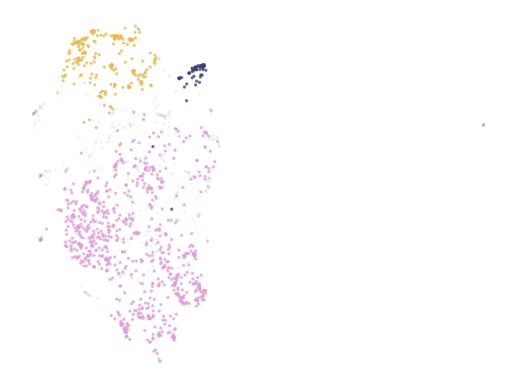

In [ ]:
import matplotlib.pyplot as plt

# Plot outliers and non-outliers seperately
plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c="grey")
plt.scatter(
    clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int),
    alpha=0.6, s=2, cmap='tab20b'
)
plt.axis('off')
# plt.savefig("matplotlib.png", dpi=300)  # Uncomment to save the graph as a .png

# Extending Text Clustering to Topic Modeling

## **BERTopic**

In [ ]:
from bertopic import BERTopic

# Train our model with our previously defined models
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(abstracts, embeddings)

2025-08-03 17:01:42,780 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-03 17:01:47,537 - BERTopic - Dimensionality - Completed ✓
2025-08-03 17:01:47,538 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-03 17:01:47,583 - BERTopic - Cluster - Completed ✓
2025-08-03 17:01:47,589 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-03 17:01:47,747 - BERTopic - Representation - Completed ✓


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,442,-1_the_of_and_to,"[the, of, and, to, in, we, topic, for, that, on]",[Improving the energy efficiency of mobile app...
1,0,746,0_the_of_and_to,"[the, of, and, to, topic, in, we, for, is, that]",[Count data is becoming more and more ubiquito...
2,1,202,1_the_and_of_to,"[the, and, of, to, in, we, on, social, covid, ...",[The outbreak of the novel Coronavirus Disease...
3,2,50,2_the_and_of_to,"[the, and, of, to, software, in, we, developer...",[Pandas is defined as a software library which...


In [ ]:
topic_model.get_topic(0)

[('the', np.float64(0.09307668367449139)),
 ('of', np.float64(0.07650560119860517)),
 ('and', np.float64(0.06394664165516475)),
 ('to', np.float64(0.06033185800675506)),
 ('topic', np.float64(0.054800433913917125)),
 ('in', np.float64(0.05208364560311139)),
 ('we', np.float64(0.0444241475761822)),
 ('for', np.float64(0.039227193034501825)),
 ('is', np.float64(0.03640763265326649)),
 ('that', np.float64(0.03523391165206715))]

In [ ]:
# Visualize topics and documents
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings=reduced_embeddings,
    width=1200,
    hide_annotations=True
)

# Update fonts of legend for easier visualization
fig.update_layout(font=dict(size=16))

In [ ]:
# Visualize barchart with ranked keywords
topic_model.visualize_barchart()

# Visualize relationships between topics
topic_model.visualize_heatmap(n_clusters=2)

# Visualize the potential hierarchical structure of topics
topic_model.visualize_hierarchy()

In [ ]:
# Save original representations
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [ ]:
def topic_differences(model, original_topics):
    """Show the differences in topic representations between two models """
    df = pd.DataFrame(columns=["Topic", "Original", "Updated"])
    for topic in original_topics.keys():

        # Extract top 5 words per topic per model
        og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
        new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])
        df.loc[len(df)] = [topic, og_words, new_words]

    return df

### KeyBERTInspired

In [ ]:
from bertopic.representation import KeyBERTInspired

# Update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model.update_topics(abstracts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

,Topic,Original,Updated
0,-1,the | of | and | to | in,topic | topics | semantic | task | analysis
1,0,the | of | and | to | topic,topic | topics | inference | modeling | corpus
2,1,the | and | of | to | in,twitter | tweets | pandemic | covid | social
3,2,the | and | of | to | software,developers | devops | github | topics | progra...


### Maximal Marginal Relevance

In [ ]:
from bertopic.representation import MaximalMarginalRelevance

# Update our topic representations to MaximalMarginalRelevance
representation_model = MaximalMarginalRelevance(diversity=0.5)
topic_model.update_topics(abstracts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

,Topic,Original,Updated
0,-1,the | of | and | to | in,of | we | topic | that | model
1,0,the | of | and | to | topic,topic | we | for | that | models
2,1,the | and | of | to | in,we | covid | media | 19 | as
3,2,the | and | of | to | software,software | we | code | topic | security


In [ ]:
from transformers import pipeline
from bertopic.representation import TextGeneration

prompt = """I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the documents and keywords, what is this topic about?"""

# Update our topic representations using Flan-T5
generator = pipeline('text2text-generation', model='google/flan-t5-small')
representation_model = TextGeneration(
    generator, prompt=prompt, doc_length=50, tokenizer="whitespace"
)
topic_model.update_topics(abstracts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
100%|██████████| 4/4 [00:02<00:00,  1.83it/s]


,Topic,Original,Updated
0,-1,the | of | and | to | in,Science/Tech | | | |
1,0,the | of | and | to | topic,Science/Tech | | | |
2,1,the | and | of | to | in,Science/Tech | | | |
3,2,the | and | of | to | software,Science/Tech | | | |


Shape of reduced_embeddings: (1440, 2)
Length of named_topic_per_doc: 1440
Unique non-outlier labels: ['0_Science/Tech___', '1_Science/Tech___', '2_Science/Tech___']
Shape of ordered_topic_centroids: (3, 5)
Content of ordered_topic_centroids: [[ 6.014988    8.858632   -1.5548795   3.0190895   0.40362608]
 [ 6.459221    5.12836    -0.9481117   0.8832017  -0.4540159 ]
 [ 7.322942    7.6200852   0.6896072   1.53374     0.62363994]]


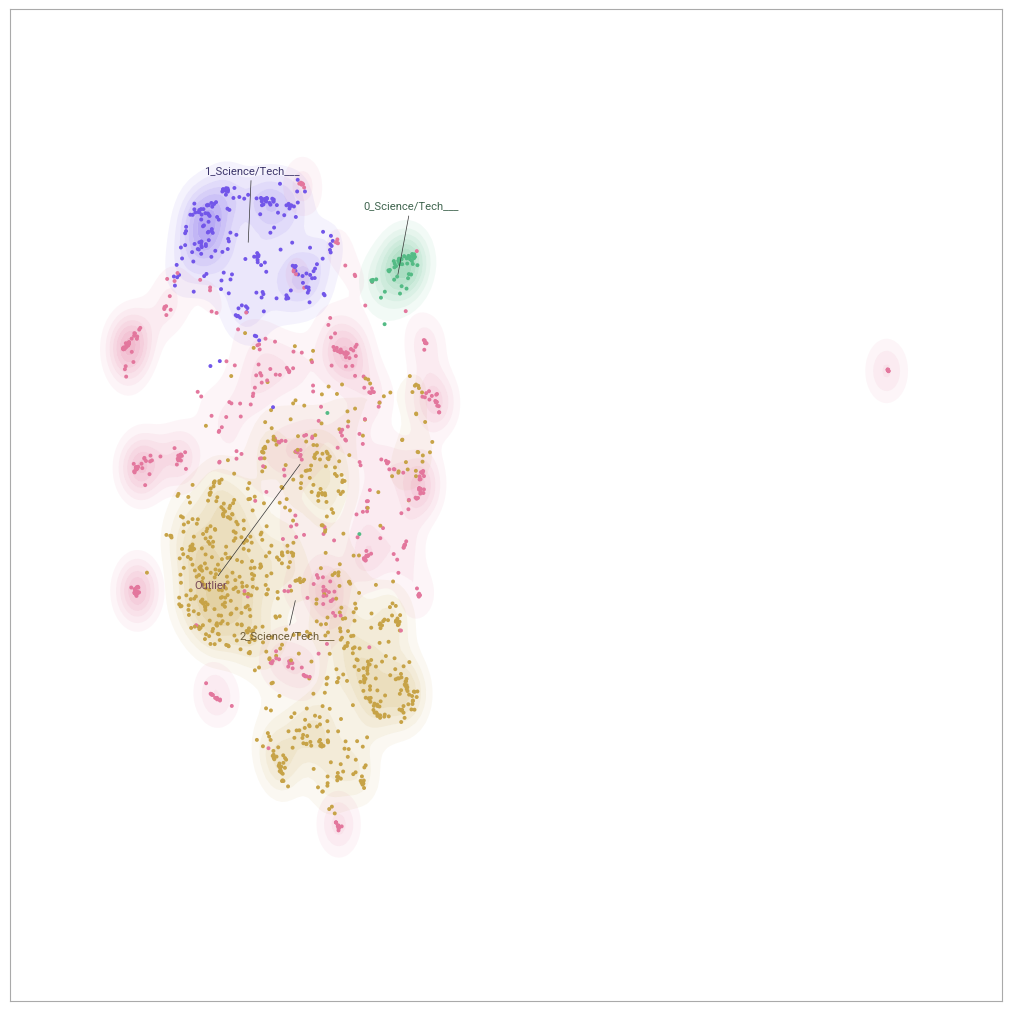

In [ ]:
import datamapplot
import numpy as np

# Get topic centroids (embeddings) and names
topic_embeddings = topic_model.topic_embeddings_[1:] # Exclude outlier topic -1 embedding
topic_centroids = umap_model.transform(topic_embeddings) # Reduce dimensionality of topic embeddings

topic_names = [topic_model.topic_labels_[topic] for topic in topic_model.get_topics() if topic != -1]

# Map document clusters to topic names for coloring
named_topic_per_doc = [topic_model.topic_labels_[cluster] if cluster != -1 else "Outlier" for cluster in clusters]

# Get unique non-outlier labels and their corresponding centroids
unique_non_outlier_labels = sorted(list(set(named_topic_per_doc) - set(["Outlier"])))
# Ensure centroids are in the same order as unique_non_outlier_labels
ordered_topic_centroids = np.array([topic_centroids[topic_names.index(label)] for label in unique_non_outlier_labels])


print("Shape of reduced_embeddings:", reduced_embeddings.shape)
print("Length of named_topic_per_doc:", len(named_topic_per_doc))
print("Unique non-outlier labels:", unique_non_outlier_labels)
print("Shape of ordered_topic_centroids:", ordered_topic_centroids.shape)
print("Content of ordered_topic_centroids:", ordered_topic_centroids)


# Create the datamapplot with minimal arguments
fig, ax = datamapplot.create_plot(
    reduced_embeddings,
    labels=named_topic_per_doc,
)

plt.savefig("datamapplot.png", dpi=300)

In [ ]:
topic_model.update_topics(abstracts, top_n_words=500)

2025-08-03 17:14:10,307 - BERTopic - WARNING: Note that extracting more than 100 words from a sparse can slow down computation quite a bit.


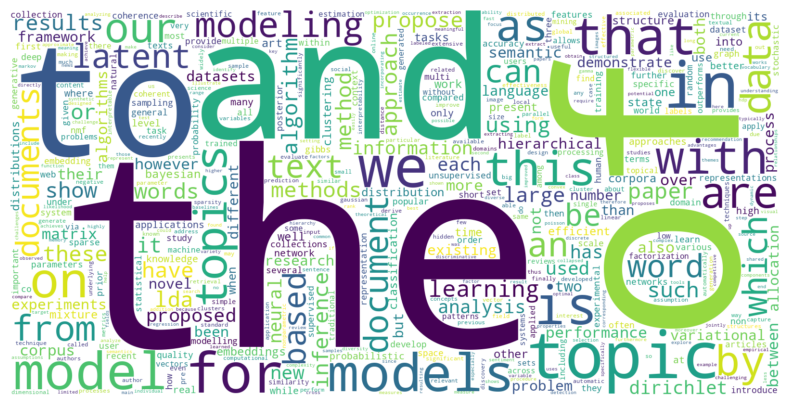

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    plt.figure(figsize=(10,5))
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000, width=1600, height=800)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=0) # Changed topic to a valid ID (0)